## Ejercicios 1 (Introducción)

Importa paquetes y lee los datos de propinas

In [1]:
%autosave 0
import pandas as pd
import plotnine
ruta = 'datos/tips.csv'
propinas = pd.read_csv(ruta)

Autosave disabled


#### 1. Examina los datos

In [2]:
propinas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


#### 2. Muestra los renglones 30 a 35 de esta tabla

In [3]:
propinas.iloc[30:36]

,total_bill,tip,sex,smoker,day,time,size
30,9.55,1.45,Male,No,Sat,Dinner,2
31,18.35,2.50,Male,No,Sat,Dinner,4
32,15.06,3.00,Female,No,Sat,Dinner,2
33,20.69,2.45,Female,No,Sat,Dinner,4
34,17.78,3.27,Male,No,Sat,Dinner,2
35,24.06,3.60,Male,No,Sat,Dinner,3


#### 3. Calcula algunos percentiles de propina

In [4]:
## Aquí calcula para cuenta total y propina
propinas['tip'].quantile([0.1, 0.5, 0.9])

0.1    1.5
0.5    2.9
0.9    5.0
Name: tip, dtype: float64

#### 4. Tabla para gráfica de cuantiles de propinas

In [5]:
# ranking 
propinas['frec_tip'] = propinas['tip'].rank(method='first') / len(propinas)
tabla_propina = propinas.loc[:,['tip', 'frec_tip']].sort_values('frec_tip')
tabla_propina

,tip,frec_tip
67,1.00,0.004098
92,1.00,0.008197
111,1.00,0.012295
236,1.00,0.016393
0,1.01,0.020492
...,...,...
141,6.70,0.983607
59,6.73,0.987705
23,7.58,0.991803
212,9.00,0.995902


#### 5. Muestra la gráfica de cuantiles

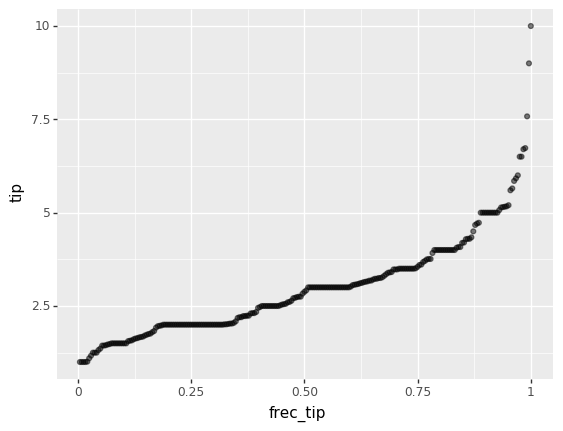

<ggplot: (-9223363298553438348)>

In [6]:
from plotnine import ggplot, aes, geom_point
# Graficar
(ggplot(tabla_propina, aes('frec_tip', 'tip')) 
  + geom_point(alpha = 0.5))

#### 6. **Preguntas**: ¿qué patrones observas en estos datos? ¿Puedes explicar las partes planas de la gráfica?

#### 7. Gráfica de cuenta total contra propinas

Haz una gráfica de cuenta total vs propinas

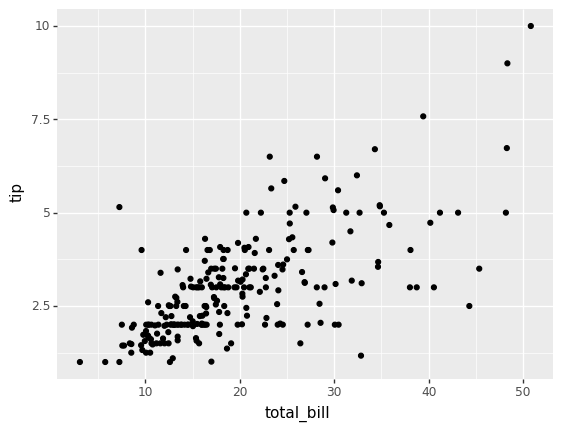

<ggplot: (-9223363298553438432)>

In [7]:
(ggplot(propinas, aes('total_bill', 'tip')) + geom_point())

#### 8. Calcula primero los porcentajes de propina en cada cuenta. Calcula algunos de sus percentiles

In [8]:
propinas['pct_propina'] = 100 * propinas['tip'] / propinas['total_bill']
propinas['pct_propina'].quantile([0.1, 0.5, 0.9, 0.99])

0.10     9.855020
0.50    15.476977
0.90    21.726271
0.99    31.122331
Name: pct_propina, dtype: float64

#### 9. Ahora haz un histograma de el porcentaje de propina sobre todas las cuentas

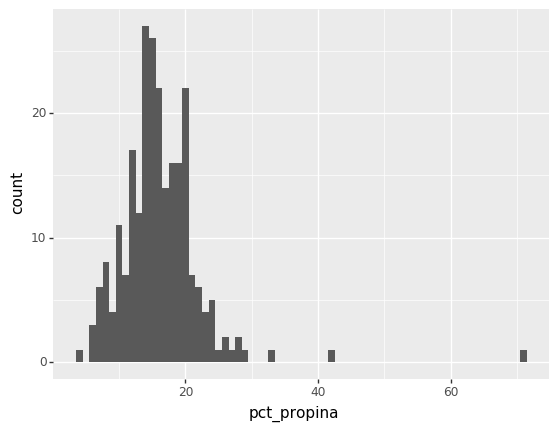

<ggplot: (8738292742057)>

In [12]:
from plotnine import geom_histogram
(ggplot(propinas, aes('pct_propina')) + geom_histogram(binwidth=1.0))

#### 10. **Pregunta**: describe la distribución de porcentaje de propina. ¿Ves algunos datos atípicos?

#### 11. Filtra los casos con porcentaje de propina muy altos. ¿Qué tipos de cuentas son? ¿Son cuentas grandes o chicas?

In [10]:
propinas.loc[propinas['pct_propina'] > 30]

,total_bill,tip,sex,smoker,day,time,size,frec_tip,pct_propina
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.004098,32.573290
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.938525,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.815574,41.666667
